<a href="https://colab.research.google.com/github/atxtori/ActionsExercise/blob/main/USL_Project_LearnerNotebook_LowCode_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning: Trade & Ahead

## Problem Statement

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 yellowbrick==1.5 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 57.8 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.25.2 which is incompatible.
xarray 2025.1.2 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0,

In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.2 yellowbrick==1.5 -q --user
!pip install --upgrade -q jinja2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 26.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.2 which is incompatible.
ibis-framework 9.2.0 requires pandas<3,>=1.5.3, but you have pandas 1.5.2 which is incompatible.
xarray 2025.1.2 requires pandas>=2.1, but you have pandas 1.5.2 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 1.5.2 which is incompatible.
bigframes 1.37.0 requires pandas>=1.5.3, but you have pandas 1.5.2 which is incompatible.
cudf-cu12 24.12.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.2 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.1 which is incompatib

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [4]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
## Complete the code to import the data
## data = pd.read_csv('____')
data = pd.read_csv('/content/drive/My Drive/stock_data.csv')

## Overview of the Dataset

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [6]:
# checking shape of the data
data.shape
## output: (num_rows, num_columns)
## Complete the code to get the shape of data

(340, 15)

### Displaying few rows of the dataset

In [7]:
# let's view a sample of the data
data.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


### Checking the data types of the columns for the dataset

In [8]:
# checking the column names and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

### Creating a copy of original data

In [9]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

### Checking for duplicates and missing values

In [10]:
# checking for duplicate values
df.duplicated().sum()
## Complete the code to get total number of duplicate values

0

In [11]:
# checking for missing values in the data
df.isnull().sum()
## Complete the code to check the missing values in the data

,0
Ticker Symbol,0
Security,0
GICS Sector,0
GICS Sub Industry,0
Current Price,0
Price Change,0
Volatility,0
ROE,0
Cash Ratio,0
Net Cash Flow,0


### Statistical summary of the dataset

**Let's check the statistical summary of the data.**

In [12]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


## Exploratory Data Analysis

### Univariate analysis

In [13]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [14]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**`Current Price`**

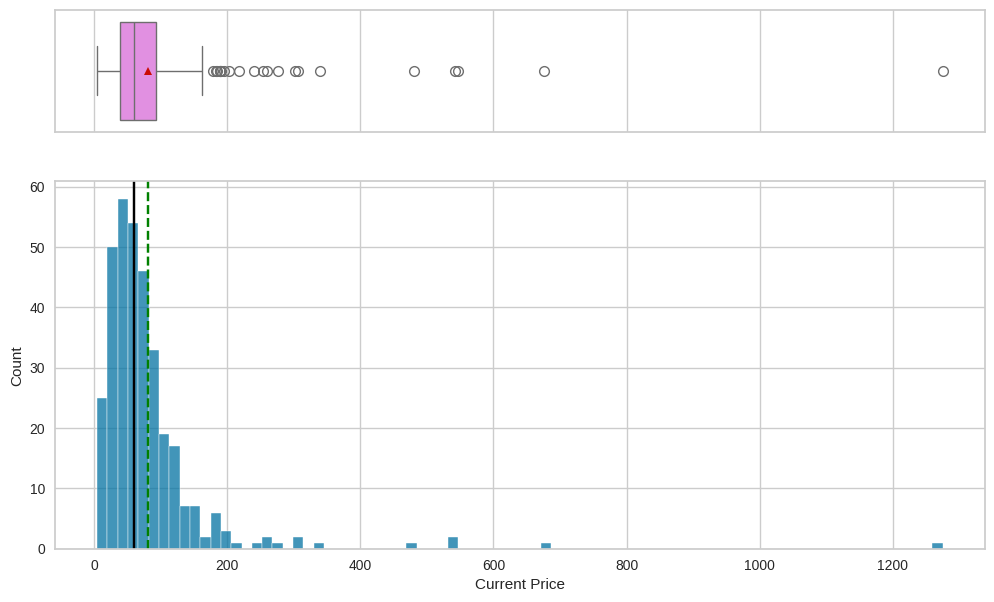

In [15]:
histogram_boxplot(df, 'Current Price')

**`Price Change`**

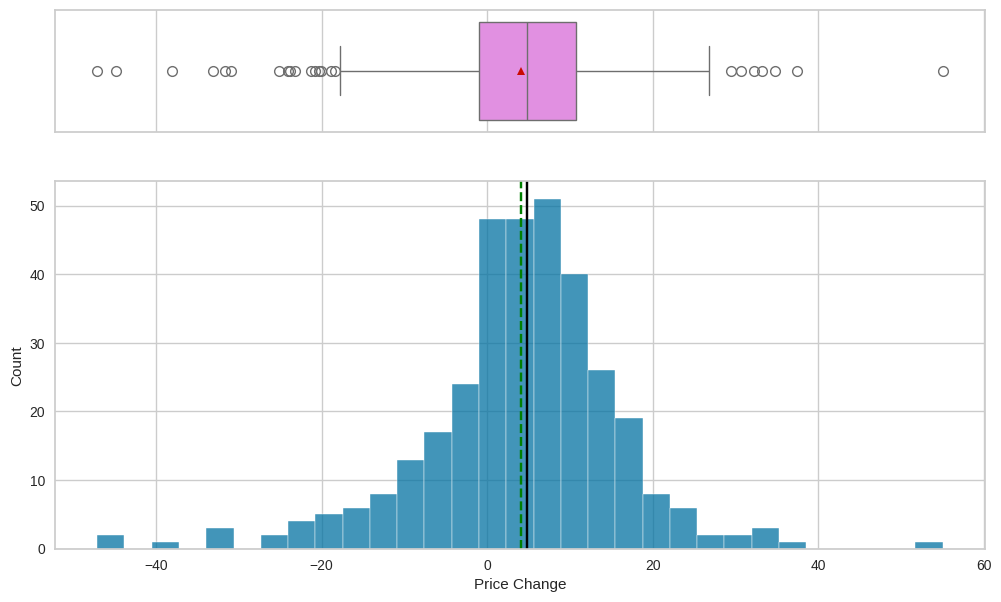

In [16]:
histogram_boxplot(df, 'Price Change')
## Complete the code to create histogram_boxplot for 'Price Change'

**`Volatility`**

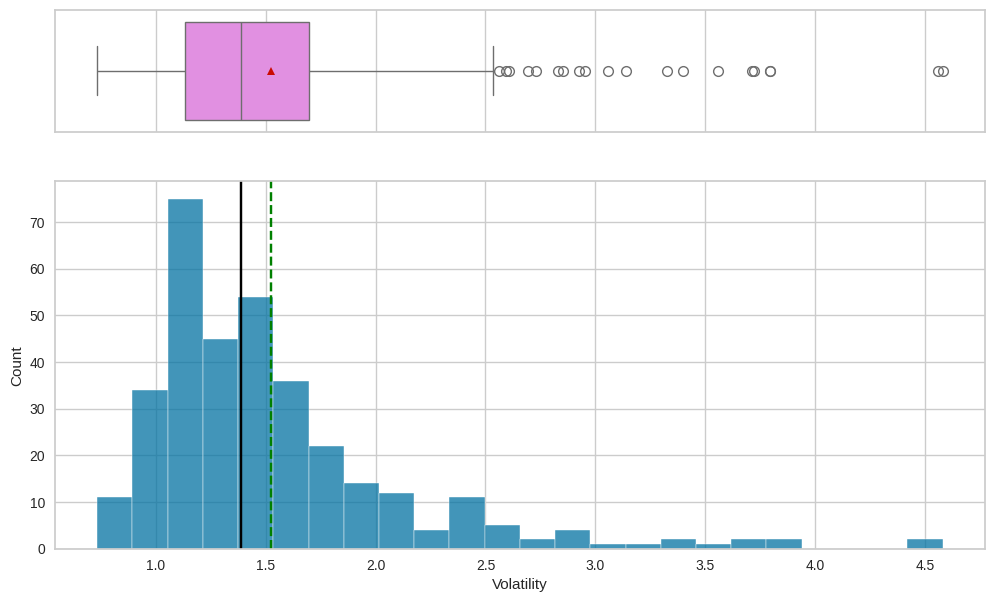

In [17]:
histogram_boxplot(df, 'Volatility')  ## Complete the code to create histogram_boxplot for 'Volatility'

**`ROE`**

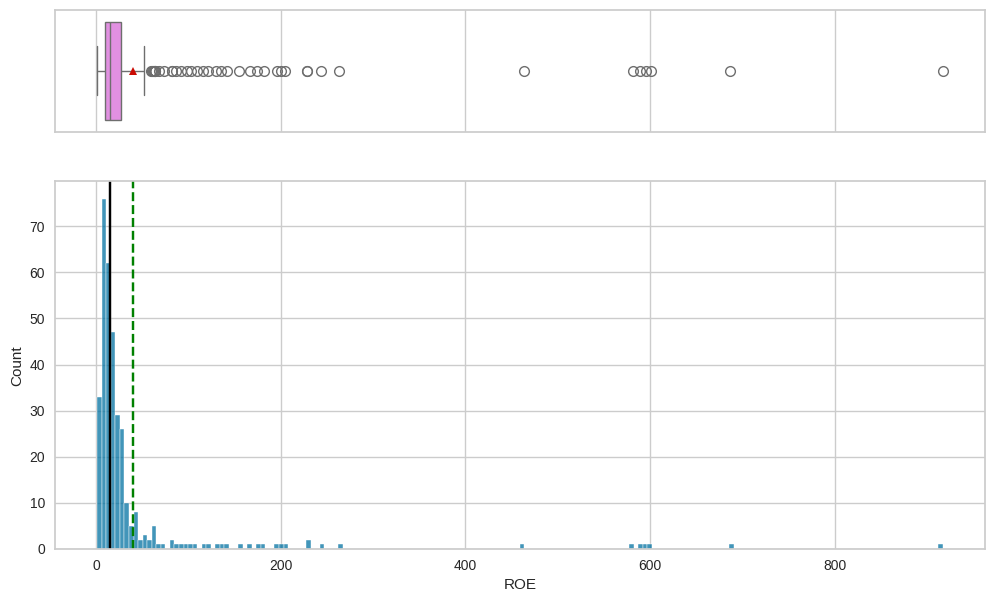

In [18]:
histogram_boxplot(df, 'ROE')  ## Complete the code to create histogram_boxplot for 'ROE'

**`Cash Ratio`**

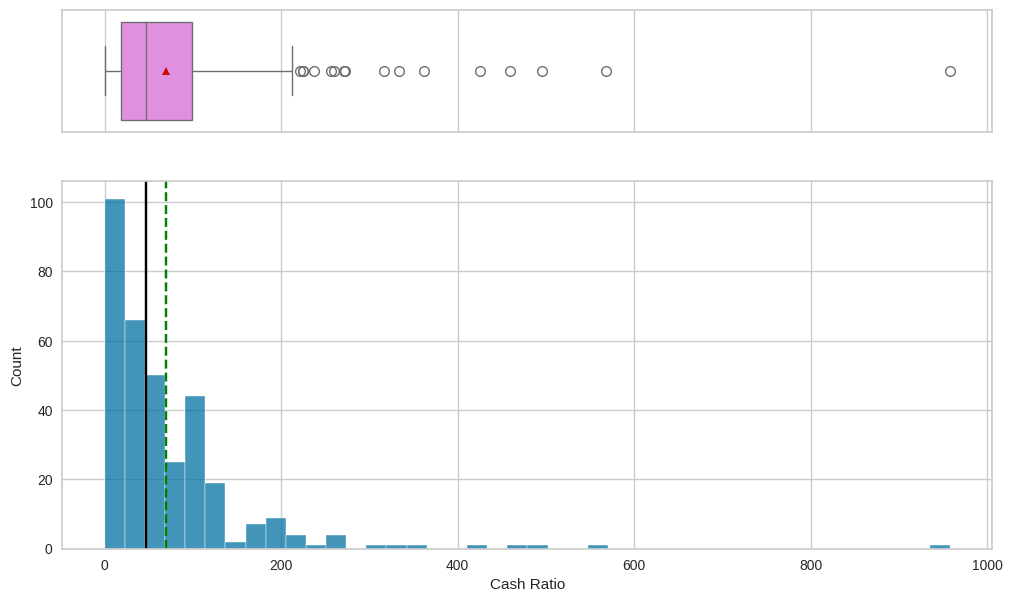

In [19]:
histogram_boxplot(df, 'Cash Ratio')  ## Complete the code to create histogram_boxplot for 'Cash Ratio'

**`Net Cash Flow`**

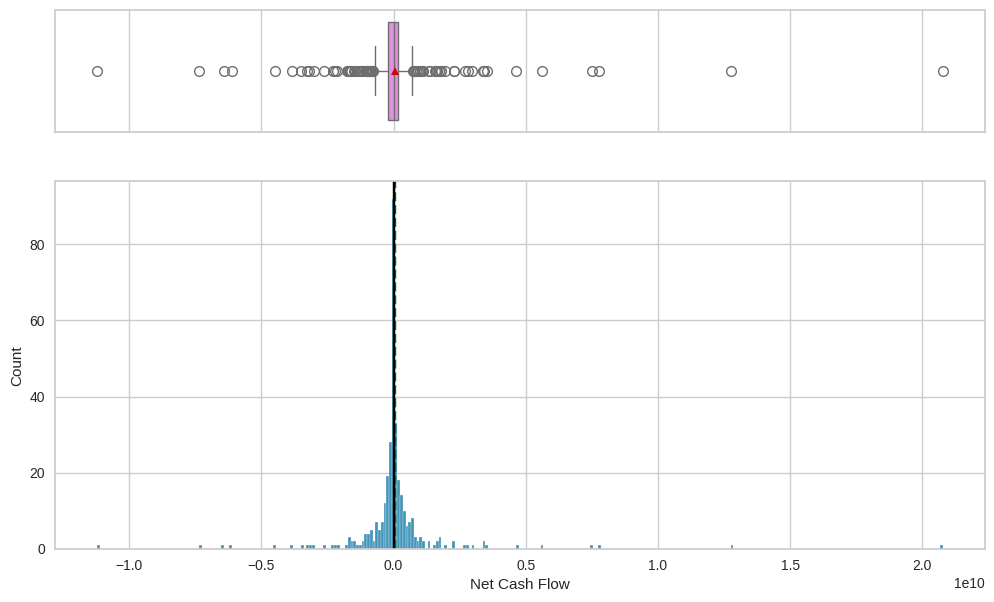

In [20]:
histogram_boxplot(df, 'Net Cash Flow')  ## Complete the code to create histogram_boxplot for 'Net Cash Flow'

**`Net Income`**

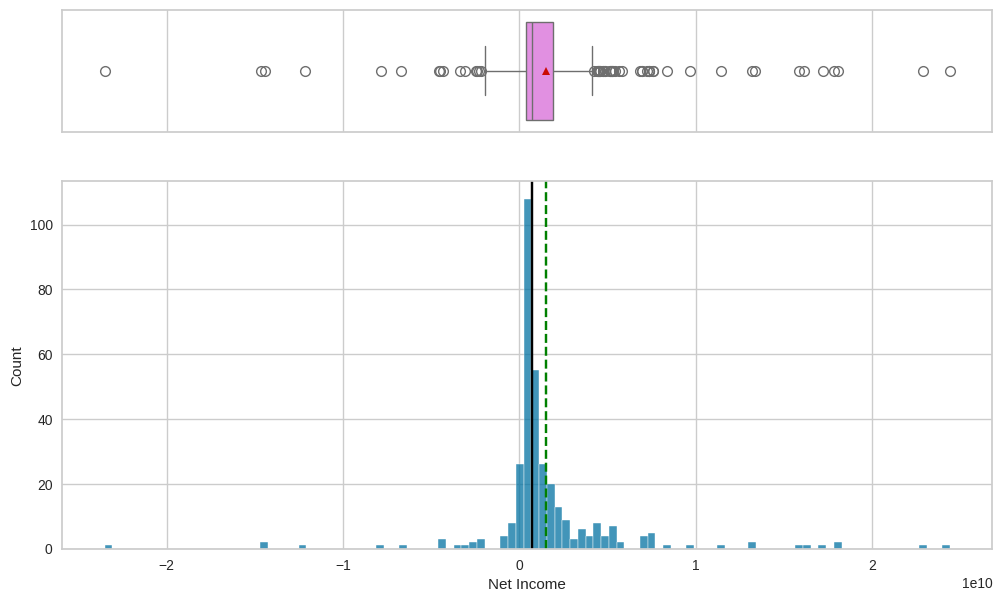

In [21]:
histogram_boxplot(df, 'Net Income')  ## Complete the code to create histogram_boxplot for 'Net Income'

**`Earnings Per Share`**

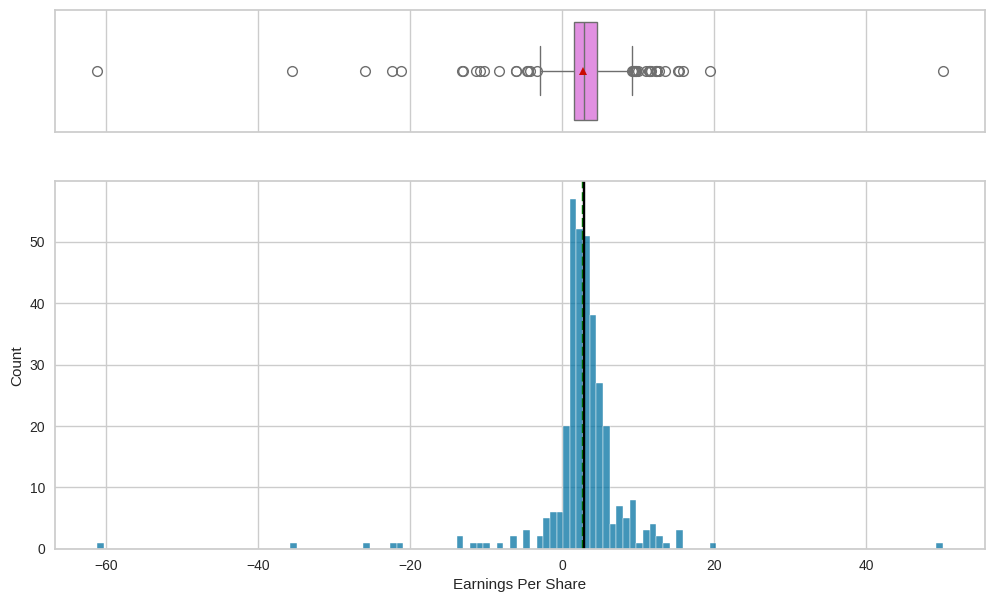

In [22]:
histogram_boxplot(df, 'Earnings Per Share')  ## Complete the code to create histogram_boxplot for 'Earnings Per Share'

**`Estimated Shares Outstanding`**

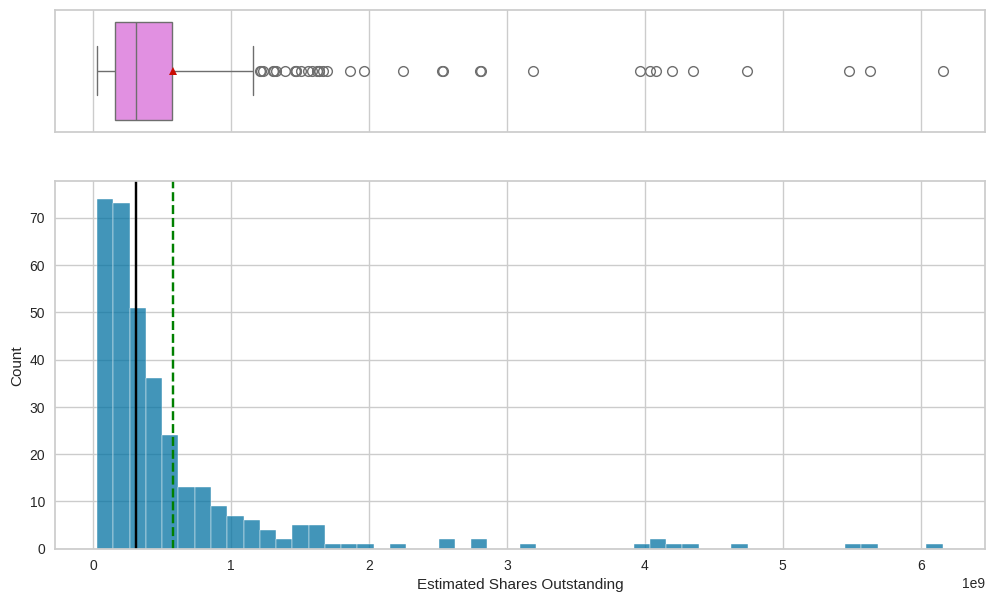

In [23]:
histogram_boxplot(df, 'Estimated Shares Outstanding')  ## Complete the code to create histogram_boxplot for 'Estimated Shares Outstanding'

**`P/E Ratio`**

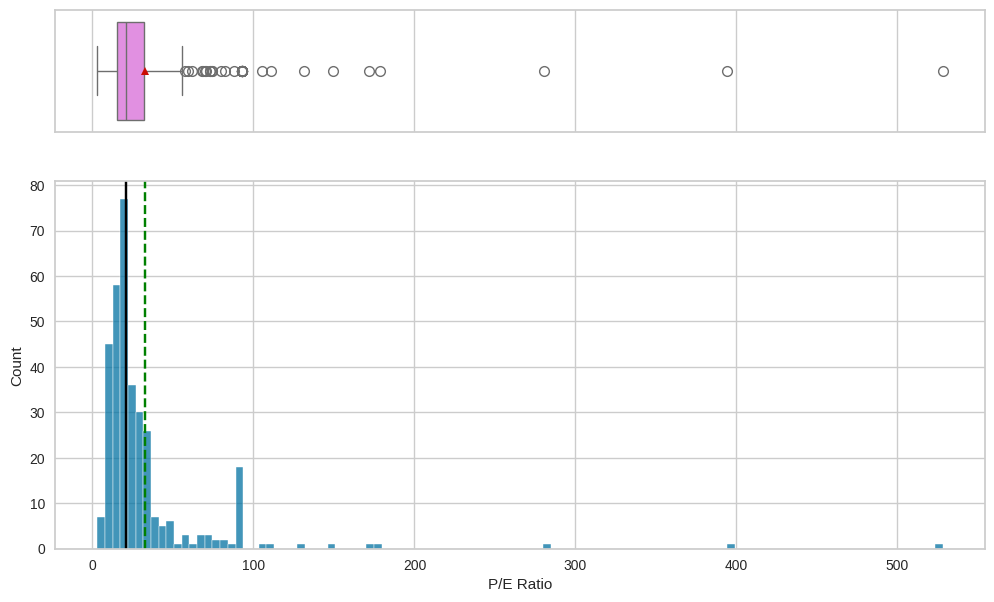

In [24]:
histogram_boxplot(df, 'P/E Ratio')  ## Complete the code to create histogram_boxplot for 'P/E Ratio'

**`P/B Ratio`**

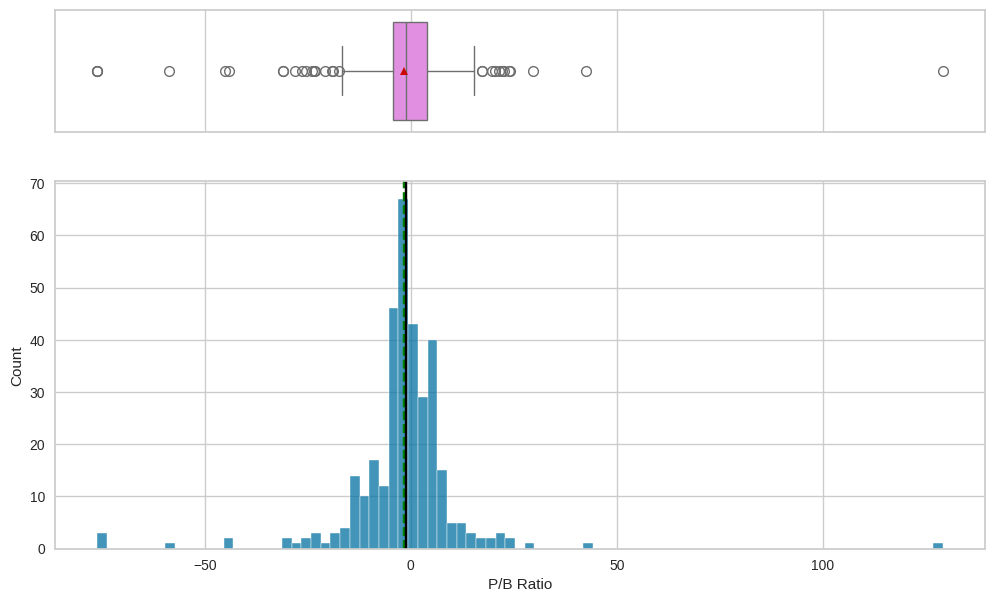

In [25]:
histogram_boxplot(df, 'P/B Ratio')  ## Complete the code to create histogram_boxplot for 'P/B Ratio'

In [26]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**`GICS Sector`**

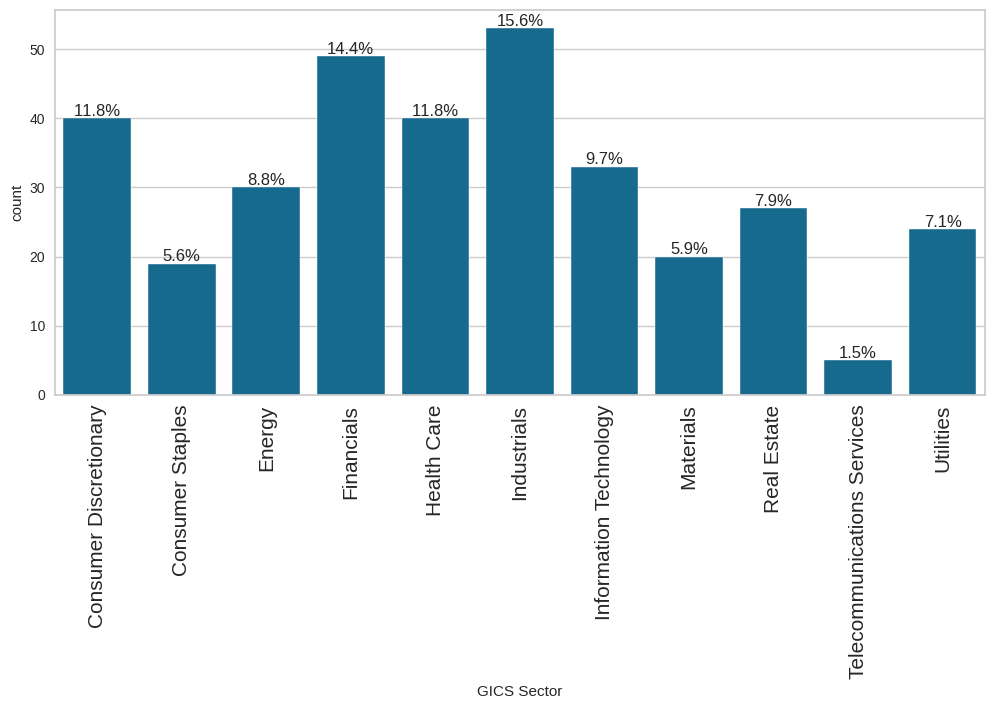

In [27]:
labeled_barplot(df, 'GICS Sector', perc=True)

**`GICS Sub Industry`**

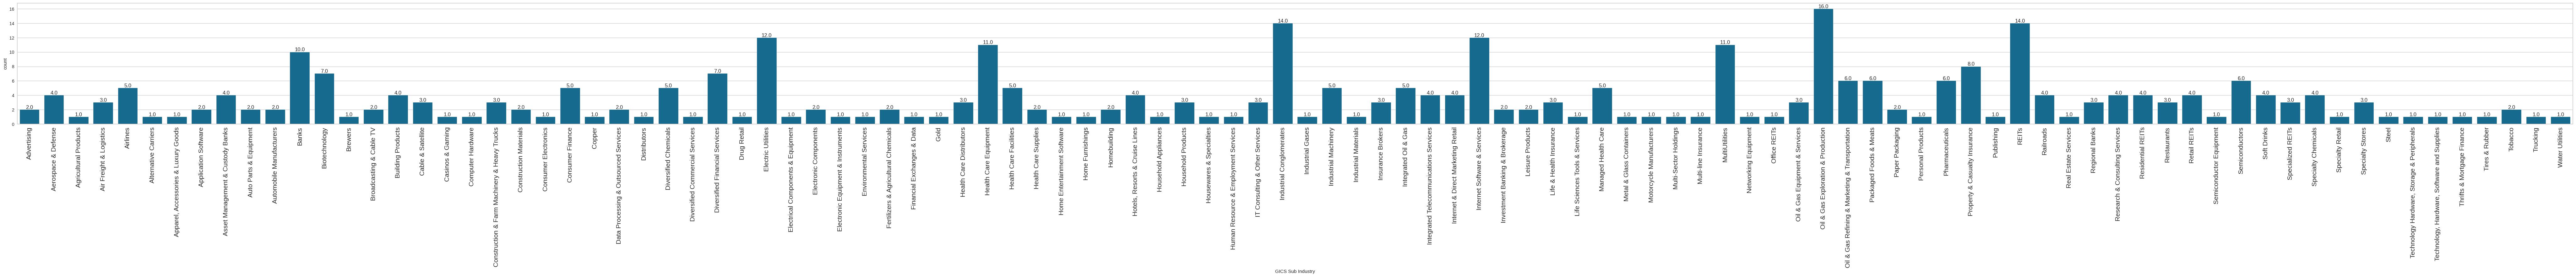

In [28]:
labeled_barplot(df, 'GICS Sub Industry')  ## Complete the code to create a labelled barplot for 'GICS Sub Industry'

### Bivariate Analysis

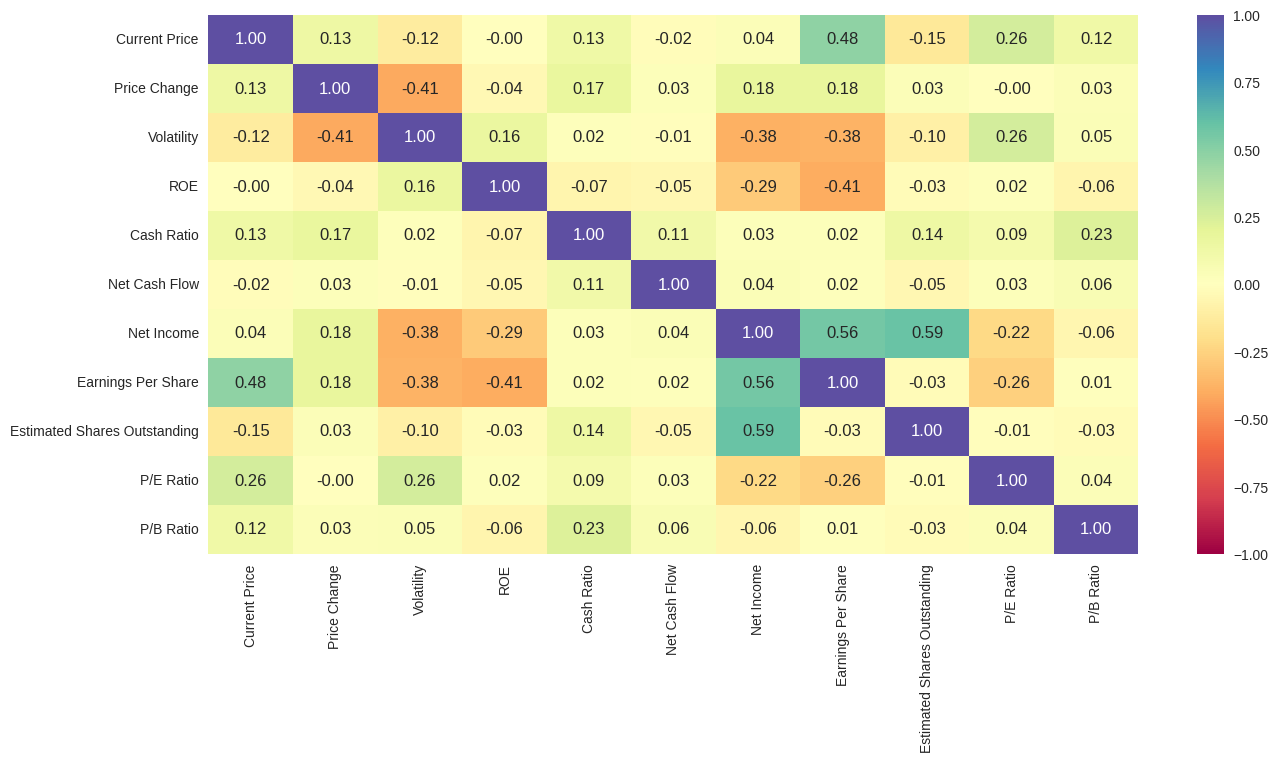

In [31]:
# correlation check
plt.figure(figsize=(15, 7))
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(
    numerical_df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Let's check the stocks of which economic sector have seen the maximum price increase on average.**

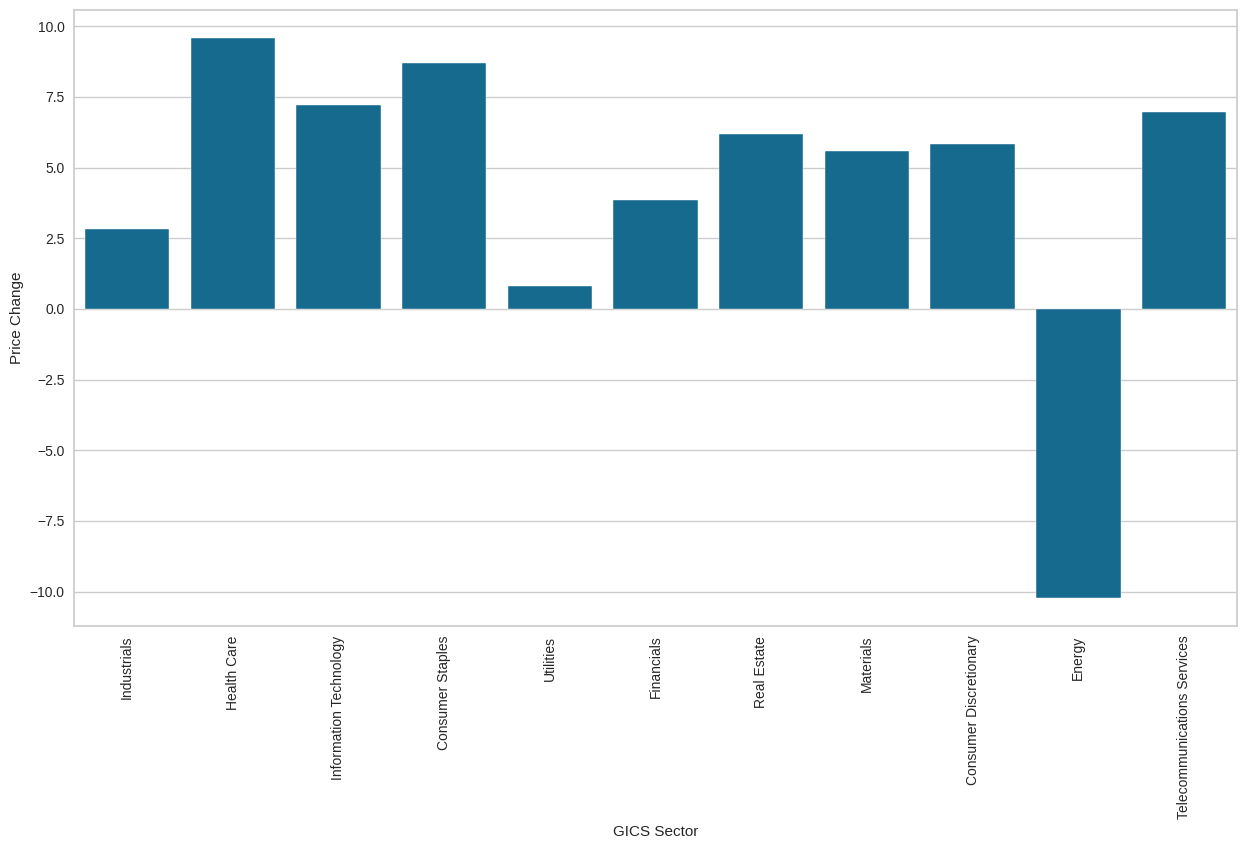

In [32]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Price Change', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

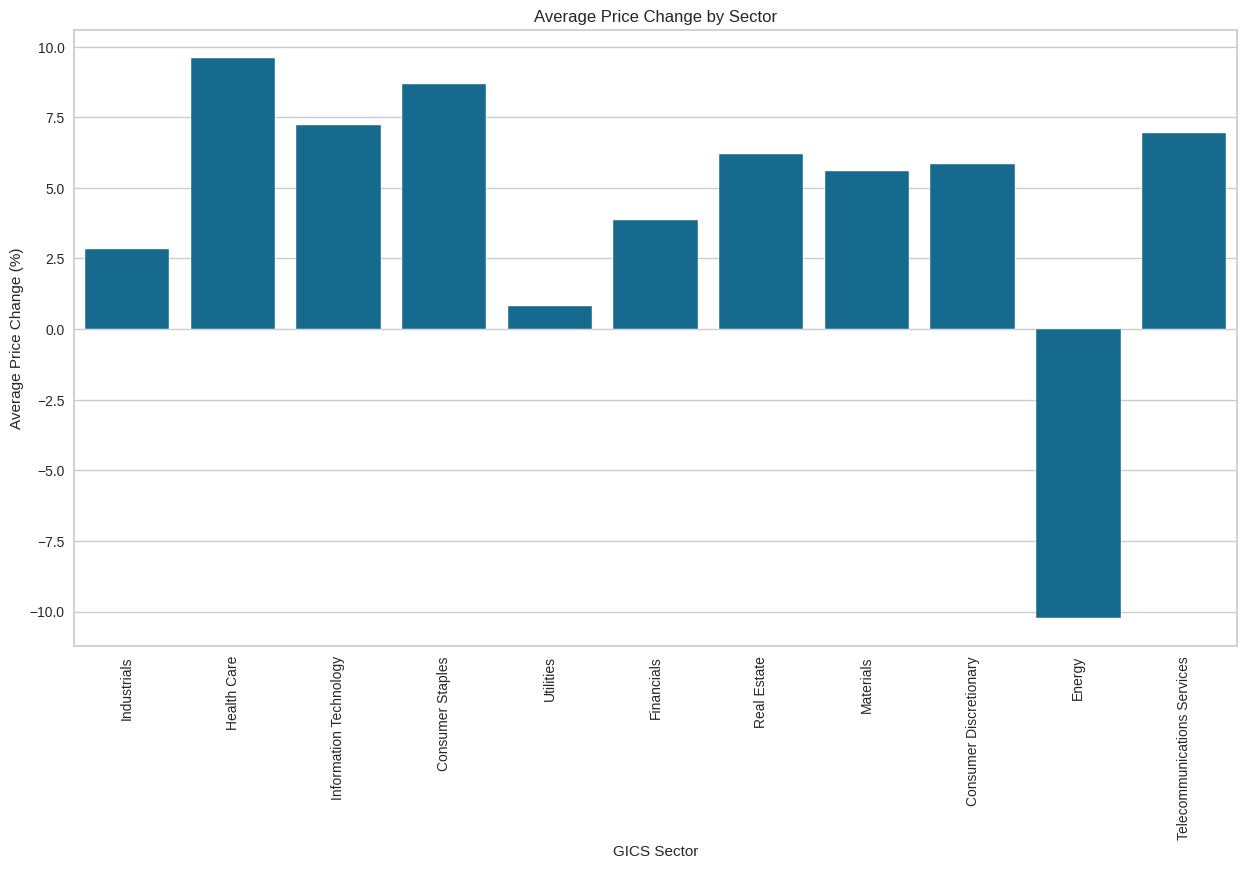

In [33]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Price Change', ci=False)  # Aggregate by sector
plt.xticks(rotation=90)
plt.ylabel("Average Price Change (%)")
plt.xlabel("GICS Sector")
plt.title("Average Price Change by Sector")
plt.show()


**Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. Let's see how the average cash ratio varies across economic sectors.**

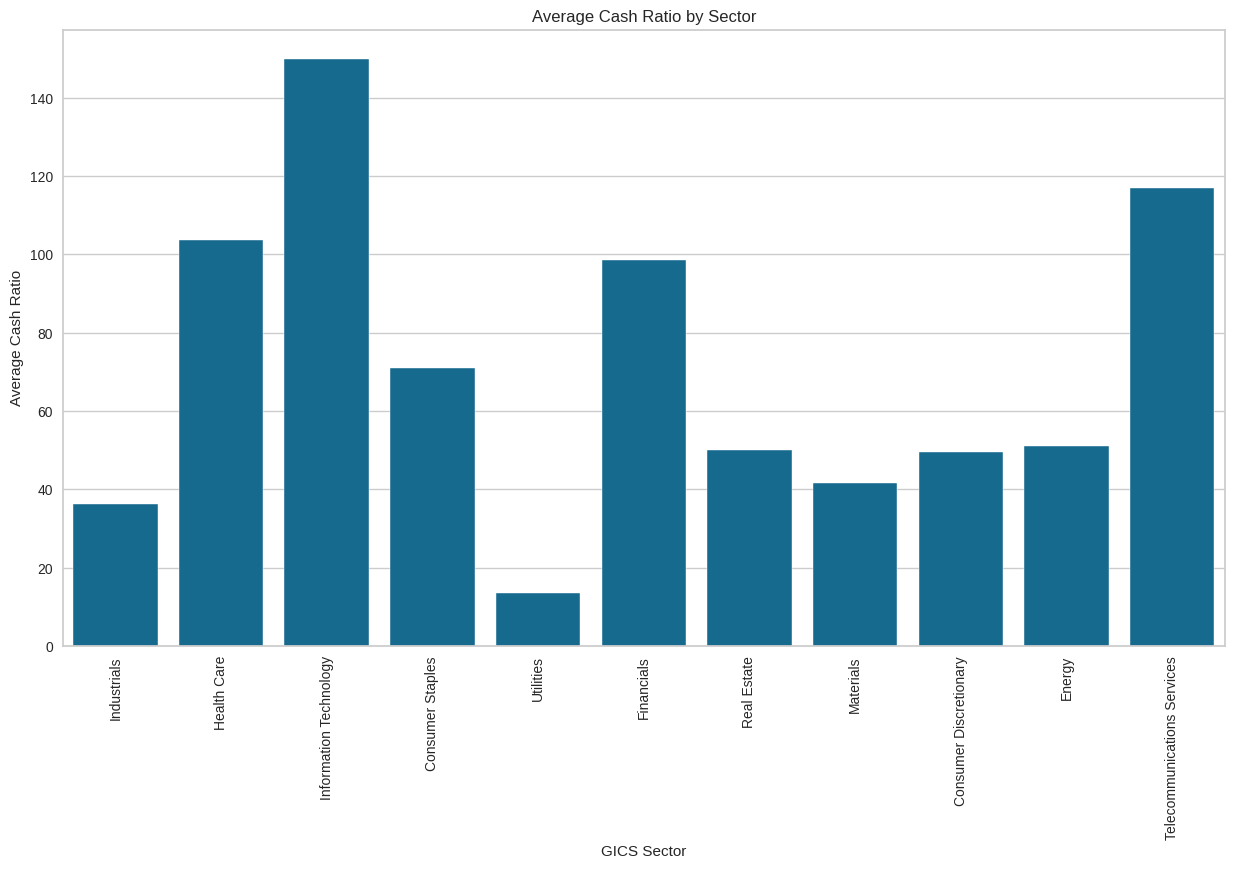

In [34]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Cash Ratio', ci=False)
# Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.ylabel("Average Cash Ratio")
plt.xlabel("GICS Sector")
plt.title("Average Cash Ratio by Sector")
plt.show()


**P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. Let's see how the P/E ratio varies, on average, across economic sectors.**

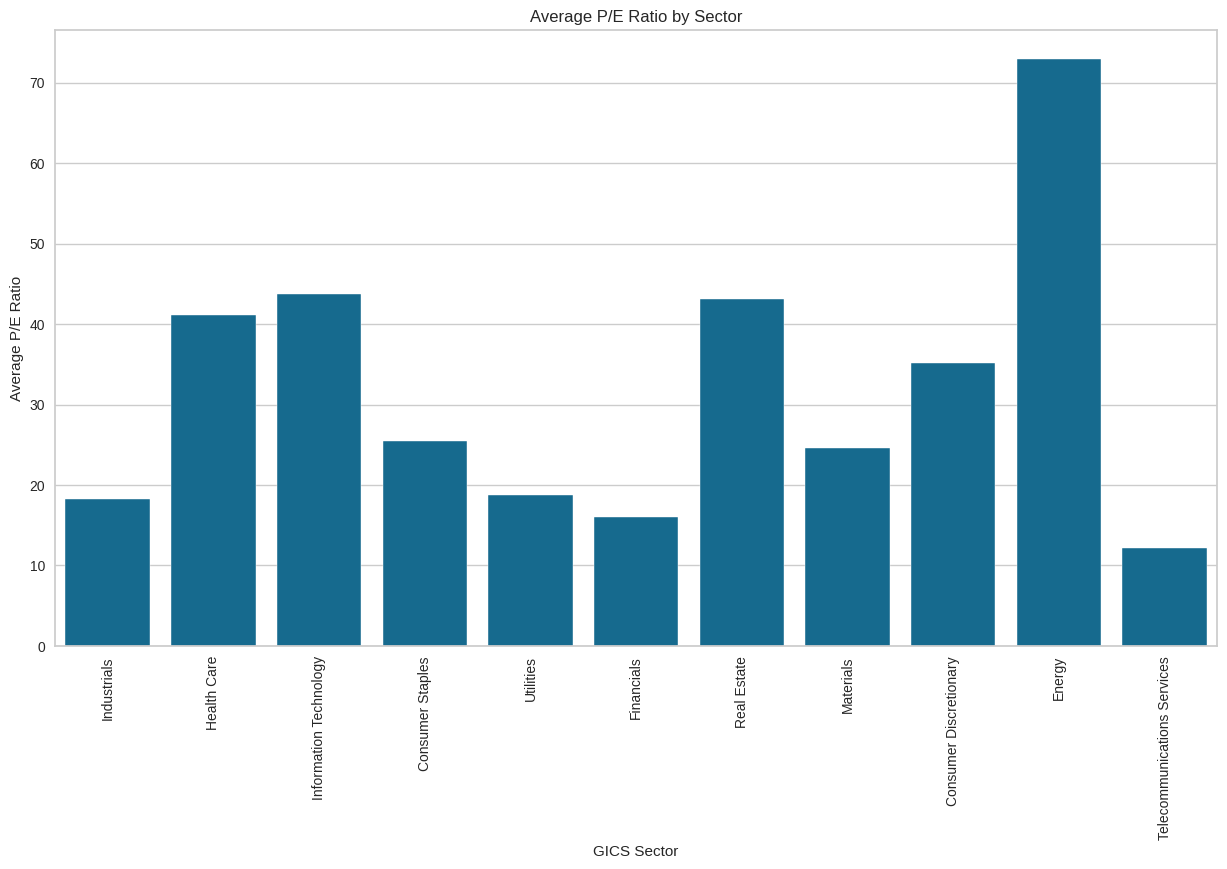

In [35]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='P/E Ratio', ci=False)
## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.ylabel("Average P/E Ratio")
plt.xlabel("GICS Sector")
plt.title("Average P/E Ratio by Sector")
plt.show()

**Volatility accounts for the fluctuation in the stock price. A stock with high volatility will witness sharper price changes, making it a riskier investment. Let's see how volatility varies, on average, across economic sectors.**

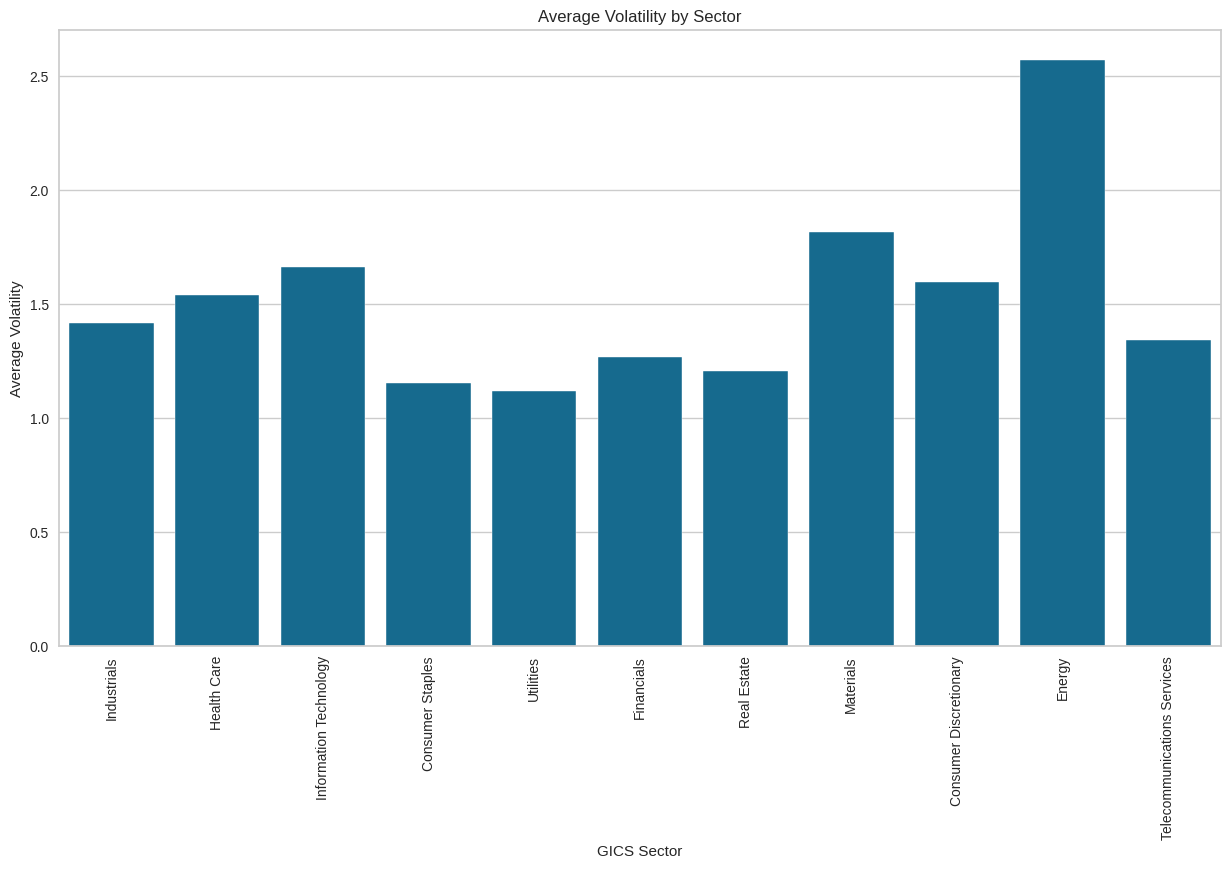

In [36]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Volatility', ci=False)
## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.ylabel("Average Volatility")
plt.xlabel("GICS Sector")
plt.title("Average Volatility by Sector")
plt.show()


## Data Preprocessing

### Outlier Check

- Let's plot the boxplots of all numerical columns to check for outliers.

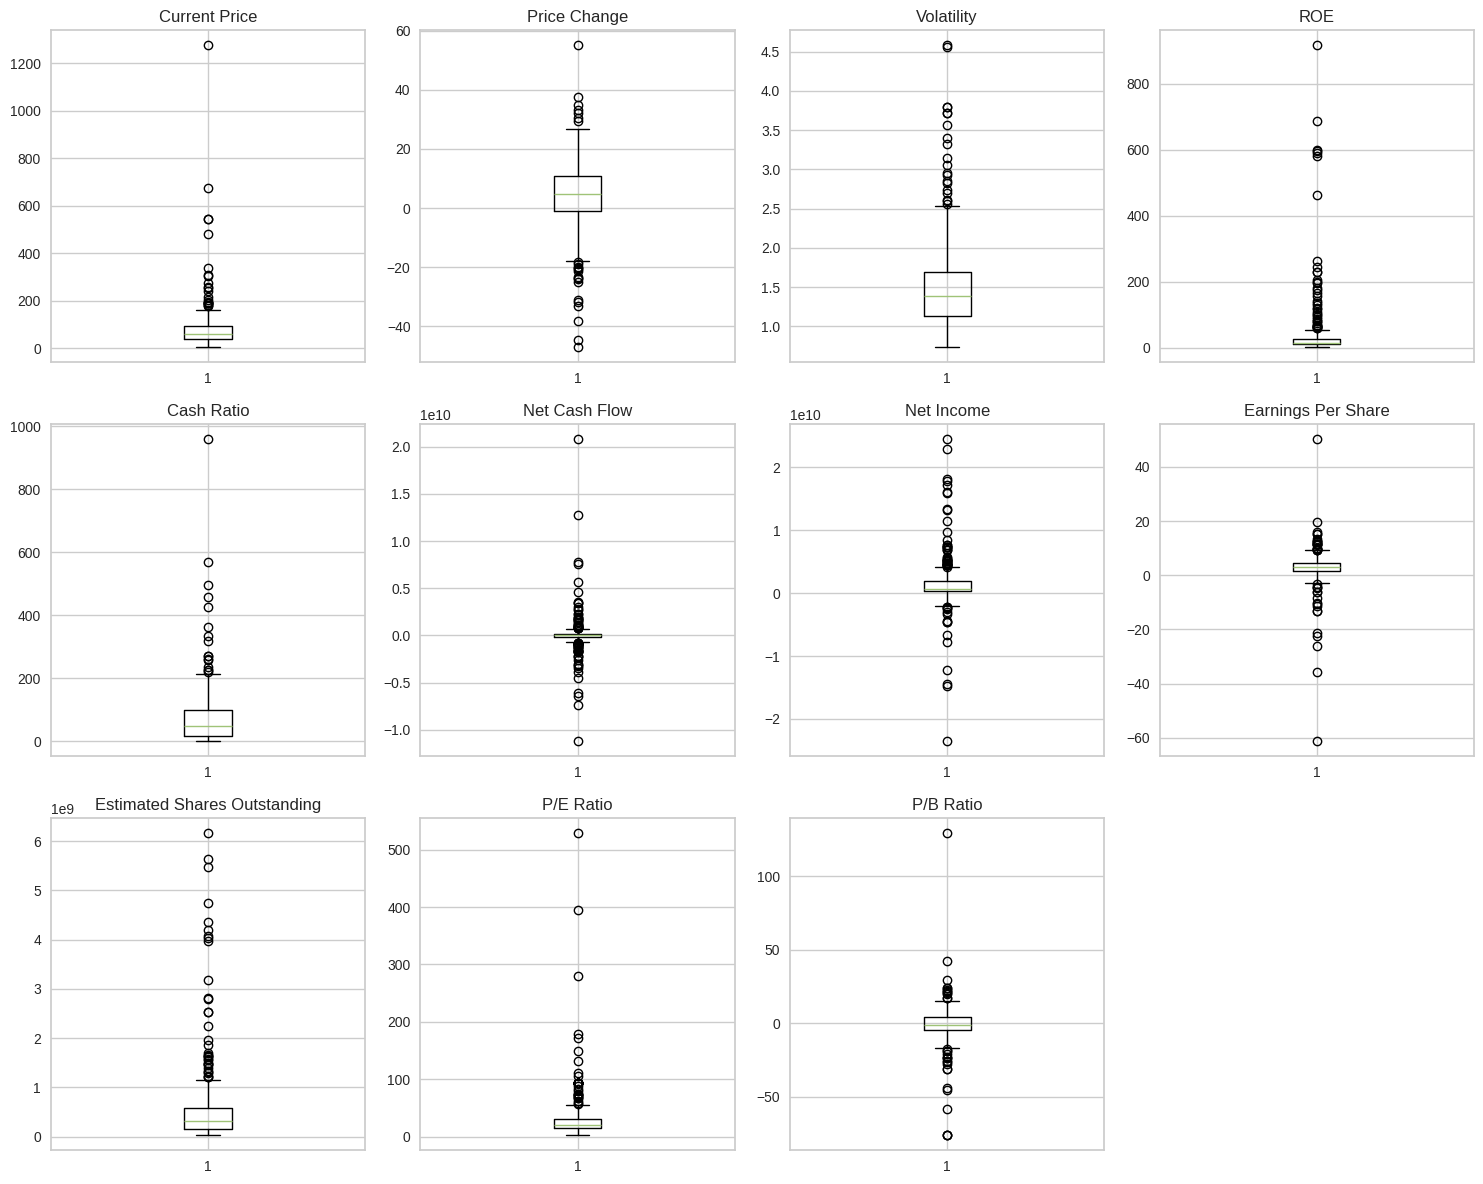

In [37]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Scaling

- Let's scale the data before we proceed with clustering.

In [38]:
# scaling the data before clustering
scaler = StandardScaler()
subset = ['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
          'Net Cash Flow', 'Net Income', 'Earnings Per Share',
          'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio']
# Select the data from the DataFrame using the column names in 'subset'
subset_scaled = scaler.fit_transform(df[subset])

In [39]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset)
# Use subset directly as it already contains the column names

## K-means Clustering

### Checking Elbow Plot

In [40]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.3862098789299604
Number of Clusters: 3 	Average Distortion: 2.33620927590848
Number of Clusters: 4 	Average Distortion: 2.219050563833442
Number of Clusters: 5 	Average Distortion: 2.133404401901685
Number of Clusters: 6 	Average Distortion: 2.081503686093715
Number of Clusters: 7 	Average Distortion: 2.0045413402786814
Number of Clusters: 8 	Average Distortion: 1.9864237824874411
Number of Clusters: 9 	Average Distortion: 1.956222103389025
Number of Clusters: 10 	Average Distortion: 1.9360473996664198
Number of Clusters: 11 	Average Distortion: 1.8615942883461607
Number of Clusters: 12 	Average Distortion: 1.8219574388532505
Number of Clusters: 13 	Average Distortion: 1.7936924742607907
Number of Clusters: 14 	Average Distortion: 1.7567842179093438


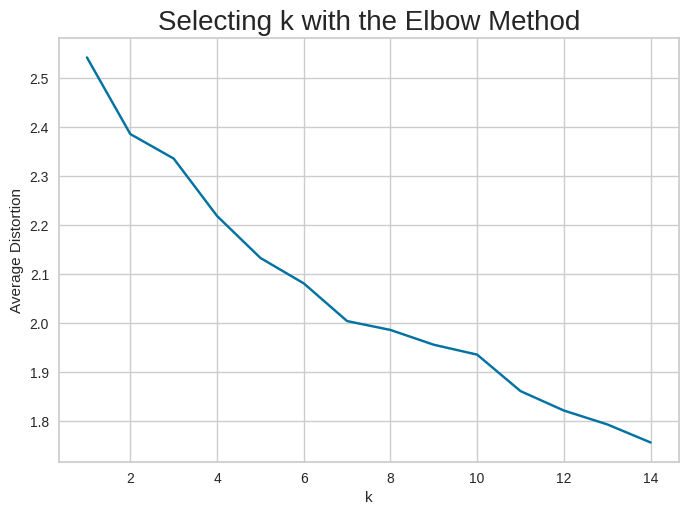

In [41]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

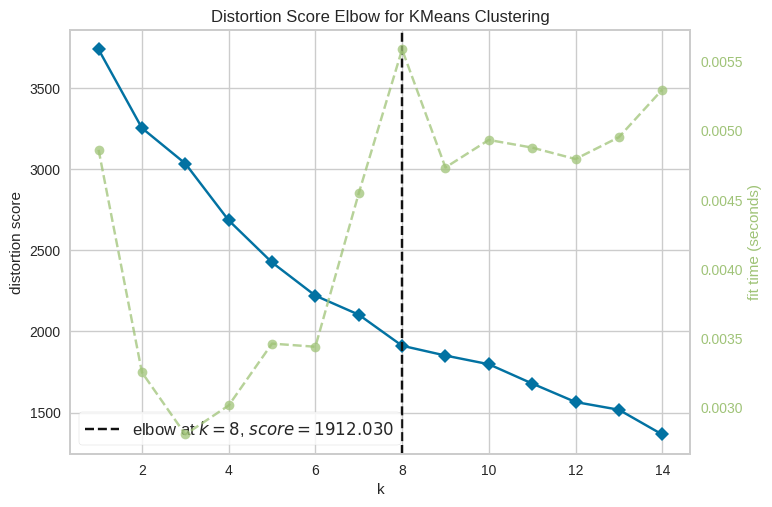

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [42]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

### Let's check the silhouette scores

For n_clusters = 2, the silhouette score is 0.45335782729503565)
For n_clusters = 3, the silhouette score is 0.40374060030338865)
For n_clusters = 4, the silhouette score is 0.4246430808437099)
For n_clusters = 5, the silhouette score is 0.4381539778147092)
For n_clusters = 6, the silhouette score is 0.40869599703024256)
For n_clusters = 7, the silhouette score is 0.1207450219233897)
For n_clusters = 8, the silhouette score is 0.3693991650696542)
For n_clusters = 9, the silhouette score is 0.35185096182499204)
For n_clusters = 10, the silhouette score is 0.32950073703610283)
For n_clusters = 11, the silhouette score is 0.1486586842527321)
For n_clusters = 12, the silhouette score is 0.15784241071085106)
For n_clusters = 13, the silhouette score is 0.15646997458716602)
For n_clusters = 14, the silhouette score is 0.16253506827999134)


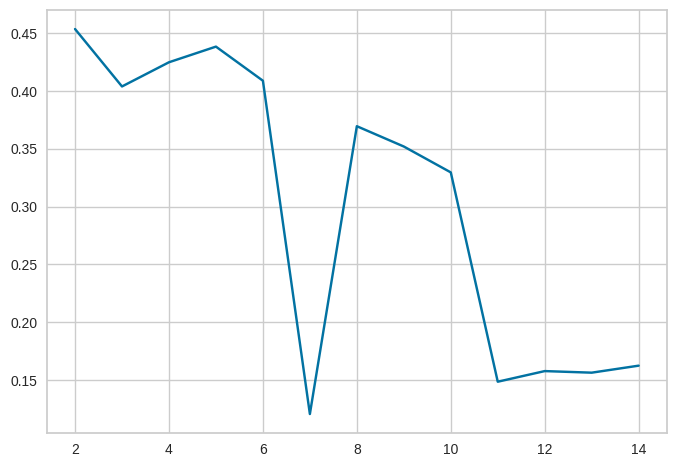

In [43]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

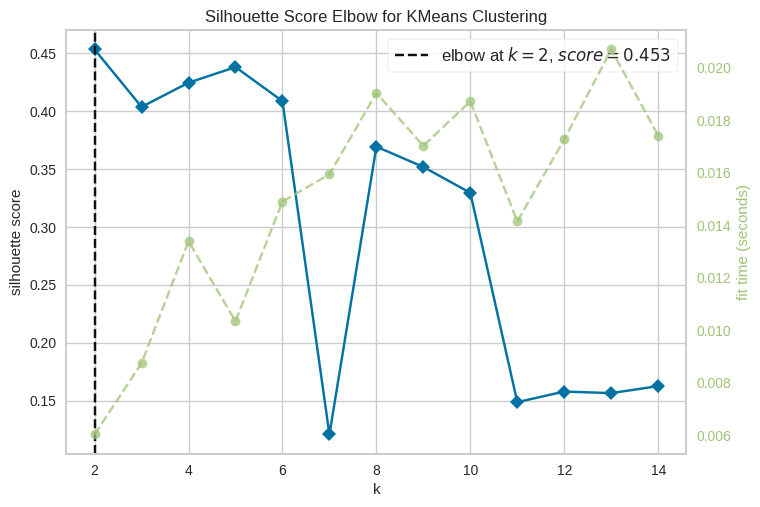

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [44]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

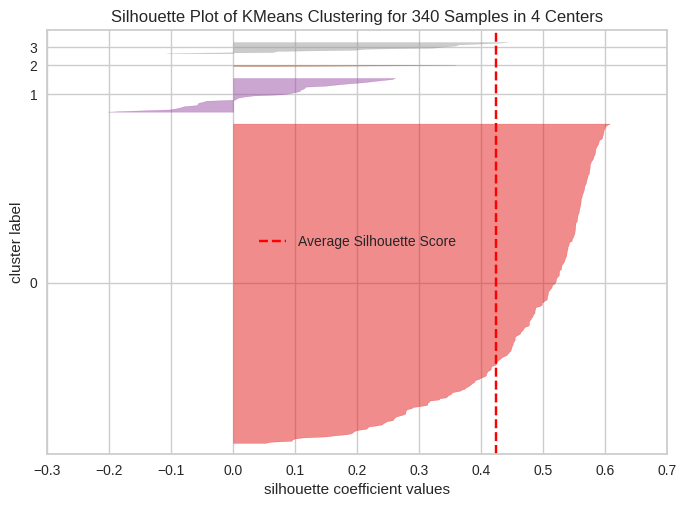

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [45]:
## finding optimal no. of clusters with silhouette coefficients

## Specify the number of clusters (replace 'X' with the chosen k)
## Based on the elbow method and silhoutte score, the optimal number of clusters seems to be 4
visualizer = SilhouetteVisualizer(KMeans(n_clusters=4, random_state=1))
## Complete the code to visualize the silhouette scores for certain number of clusters
## Fit the model to the data
visualizer.fit(k_means_df)

## Display the silhouette visualization
visualizer.show()

### Creating Final Model

In [46]:
# Final K-means model
kmeans = KMeans(n_clusters=6, random_state=1)  # Use the chosen number of clusters (6)
kmeans.fit(k_means_df)


KMeans(n_clusters=6, random_state=1)

In [47]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

### Cluster Profiling

In [49]:
# Cluster Profiling: Compute the mean of each numerical feature per cluster
# Select only numeric columns before calculating the mean
km_cluster_profile = df1.select_dtypes(include=np.number).groupby("KM_segments").mean()

# Display the cluster profile
km_cluster_profile

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
KM_segments,,,,,,,,,,,
0,72.976734,5.192788,1.376317,34.941606,53.197080,-1.033761e+07,1.495250e+09,3.650566,4.357691e+08,23.699140,-3.417280
1,34.231808,-15.515565,2.832069,48.037037,47.740741,-1.286515e+08,-2.444319e+09,-6.284444,5.030315e+08,75.627265,1.655990
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1.292500e+09,-1.910650e+10,-41.815000,5.195740e+08,60.748608,1.565141
3,46.672222,5.166566,1.079367,25.000000,58.333333,-3.040667e+09,1.484844e+10,3.435556,4.564960e+09,15.596051,-6.354193
4,204.930931,11.885400,1.699460,30.040000,279.920000,2.121807e+09,2.724132e+09,6.558000,7.993189e+08,43.517668,15.097707
5,327.006671,21.917380,2.029752,4.000000,106.000000,6.982407e+08,2.875470e+08,0.750000,3.667632e+08,400.989188,-5.322376


In [50]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Security"].count().values  ## Group by cluster labels
)


In [51]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
KM_segments,,,,,,,,,,,,
0,72.976734,5.192788,1.376317,34.941606,53.197080,-10337605.839416,1495249751.824817,3.650566,435769103.743102,23.699140,-3.417280,274
1,34.231808,-15.515565,2.832069,48.037037,47.740741,-128651518.518519,-2444318518.518518,-6.284444,503031539.057037,75.627265,1.655990,27
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2
3,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,9
4,204.930931,11.885400,1.699460,30.040000,279.920000,2121806560.000000,2724131680.000000,6.558000,799318866.712800,43.517668,15.097707,25
5,327.006671,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,366763235.300000,400.989188,-5.322376,3


In [52]:
# Complete the code to print the companies in each cluster - unique cluster label
for cl in df1["KM_segments"].unique():
    print(f"In cluster {cl}, the following companies are present:")
    # Filter the DataFrame for the current cluster and print unique company names
    print(df1[df1["KM_segments"] == cl]["Security"].unique())
    print()  # Add a newline for better readability


In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Activision Blizzard'
 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castle Internationa

In [53]:
df1.groupby(["KM_segments", "GICS Sector"])['Security'].count()

KM_segments  GICS Sector                
0            Consumer Discretionary         33
             Consumer Staples               17
             Energy                          5
             Financials                     45
             Health Care                    29
             Industrials                    51
             Information Technology         24
             Materials                      18
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
1            Energy                         21
             Industrials                     2
             Information Technology          2
             Materials                       2
2            Energy                          2
3            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     1
             Telecommunications Services     2
4            Consumer Discretionary          5
             Consumer Staples                1
             Energy                          1
             Financials                      1
             Health Care                     9
             Information Technology          6
             Real Estate                     1
             Telecommunications Services     1
5            Consumer Discretionary          1
             Health Care                     1
             Information Technology          1
Name: Security, dtype: int64

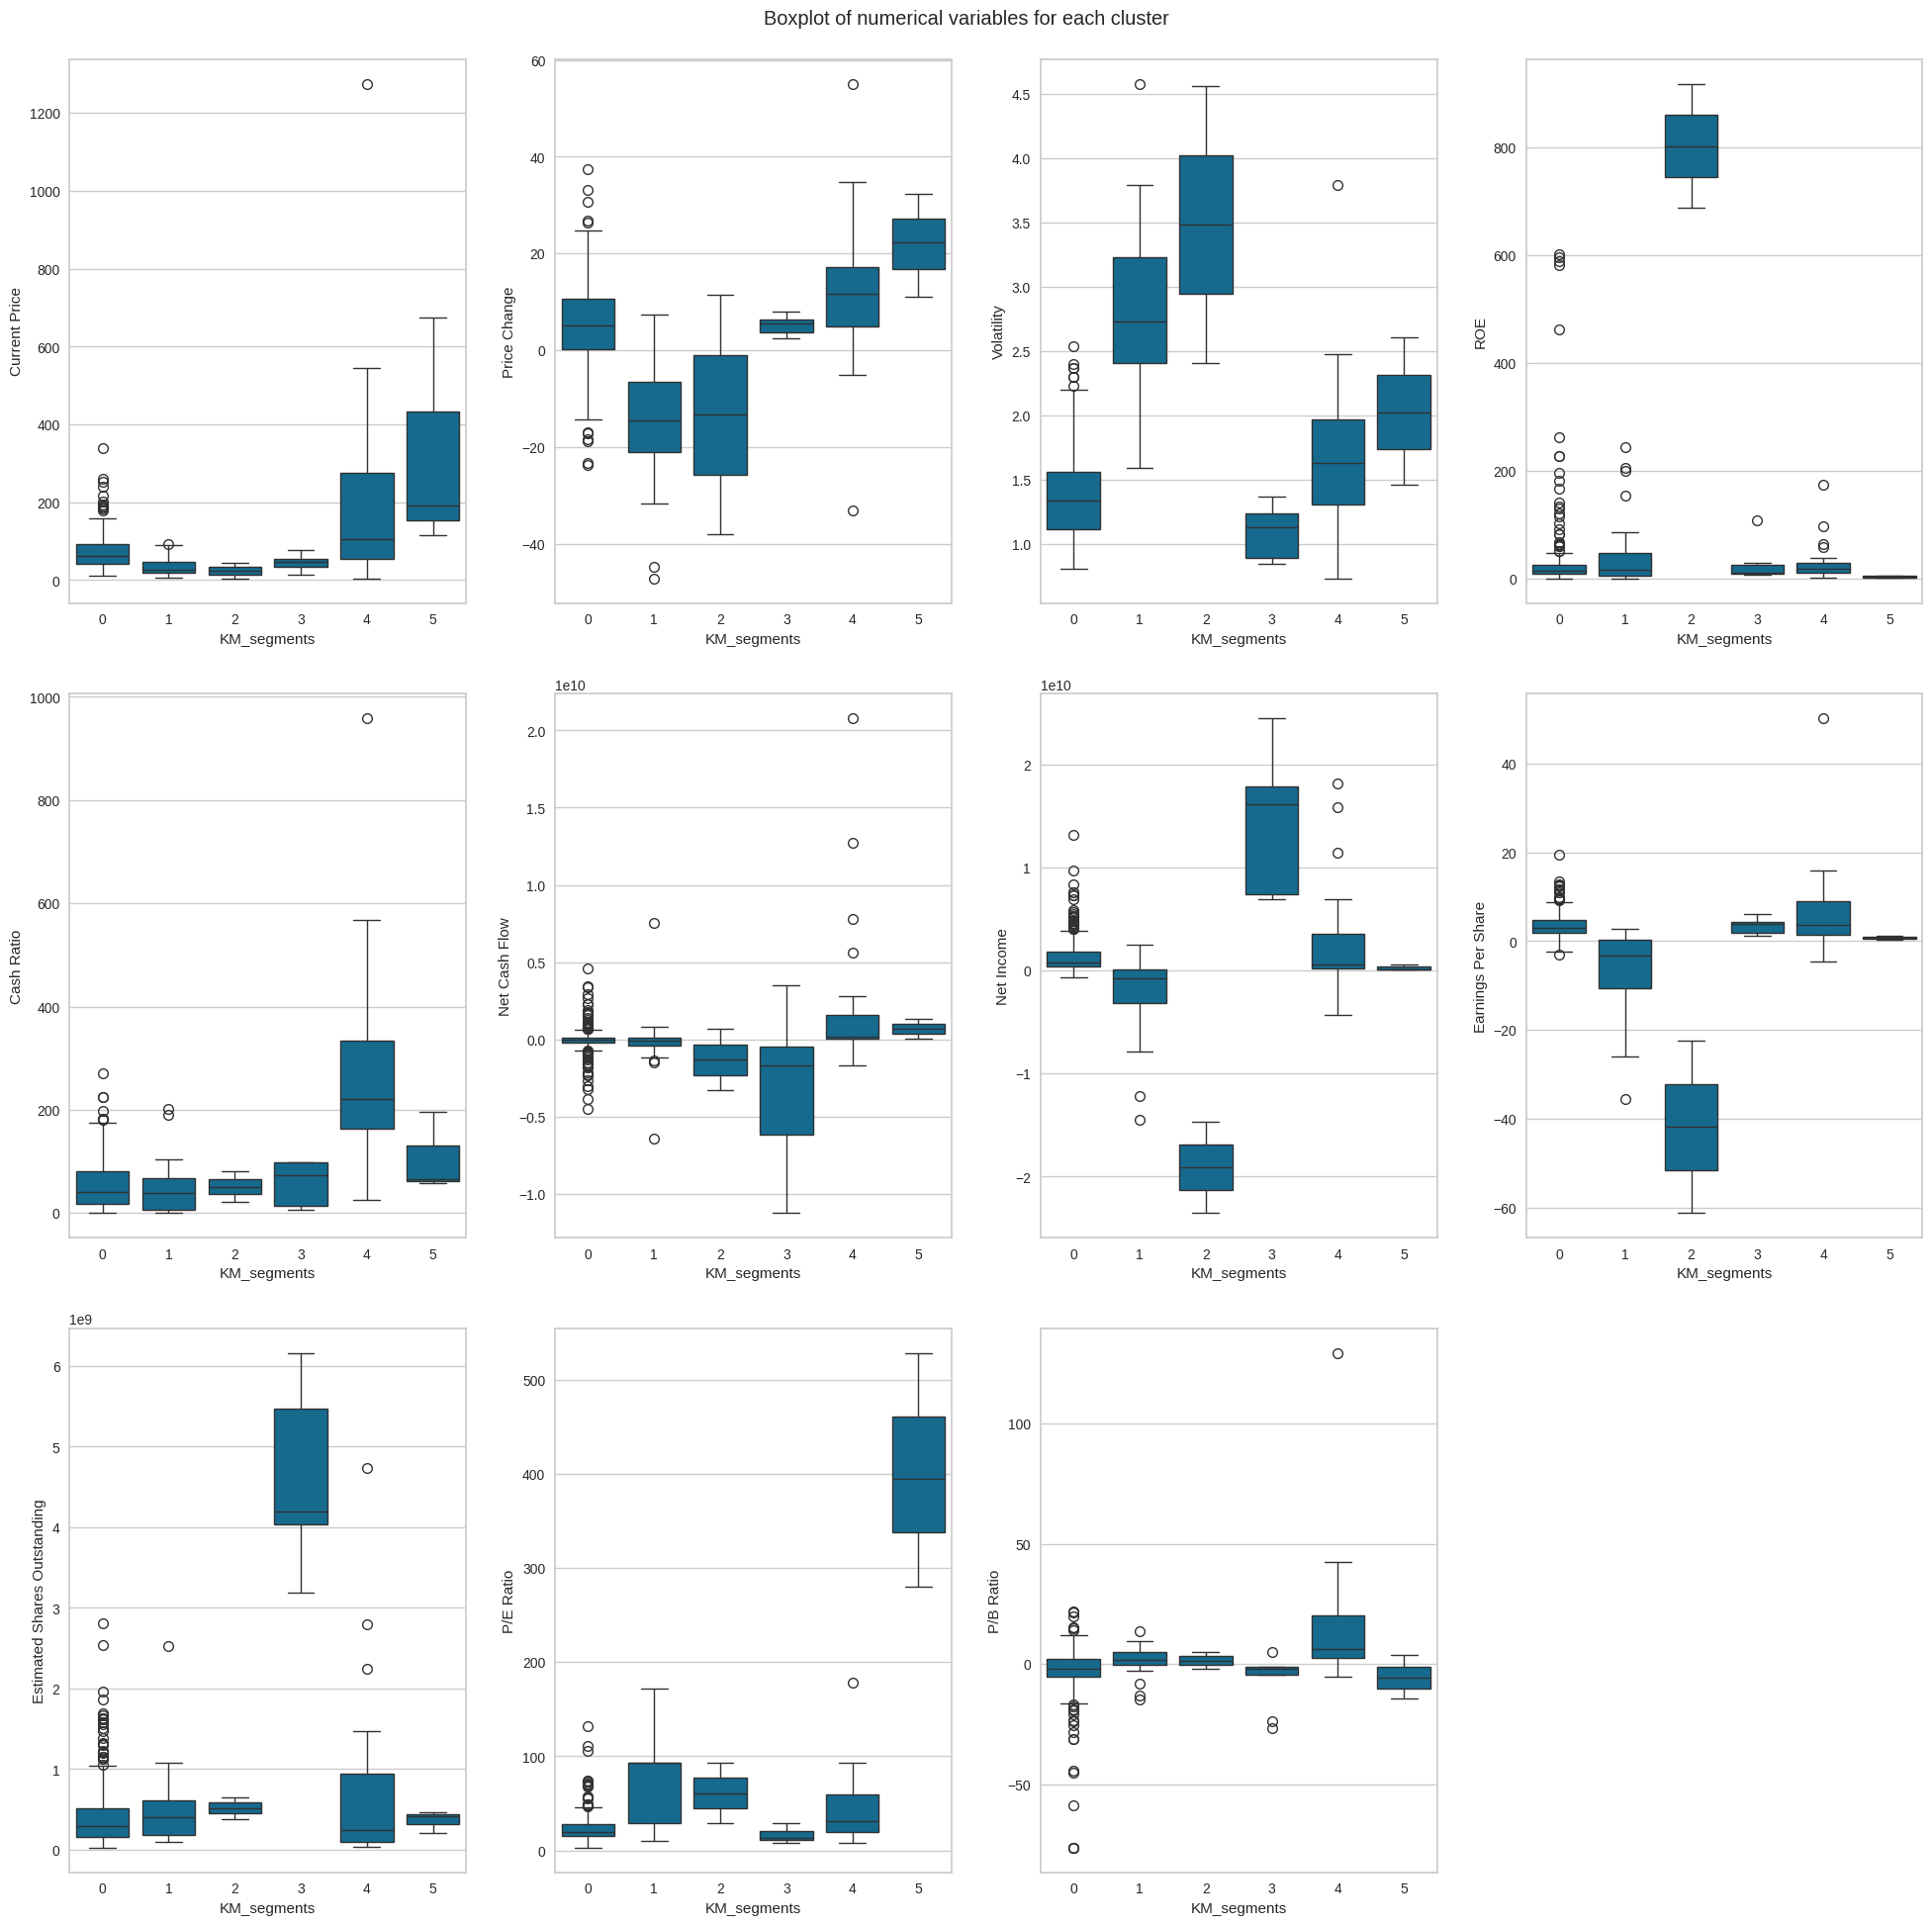

In [54]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

### Insights

-


## Hierarchical Clustering

### Computing Cophenetic Correlation

In [55]:
hc_df = subset_scaled_df.copy()

In [57]:
# list of distance metrics
distance_metrics = ['euclidean', 'cityblock', 'cosine']  ## Commonly used distance metrics

# list of linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']  ## Commonly used linkage methods

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        if lm == 'ward' and dm != 'euclidean':  # Ward linkage only supports Euclidean distance
            continue
        # Calculate pairwise distances first if metric is not 'euclidean'
        if dm != 'euclidean':
            y = pdist(hc_df, metric=dm)  # Precompute distances
            Z = linkage(y, method=lm)  # Pass precomputed distances
        else:
            Z = linkage(hc_df, metric=dm, method=lm)  # Direct linkage for Euclidean

        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and ward linkage is 0.7101180299865353.
Cophenetic correlation for Cityblock distance and single linkage is 0.9334186366528574.
Cophenetic correlation for Cityblock distance and complete linkage is 0.7375328863205818.
Cophenetic correlation for Cityblock distance and average linkage is 0.9302145048594667.
Cophenetic correlation for Cosine distance and single linkage is 0.1633637841831045.
Cophenetic correlation for Cosine distance and complete linkage is 0.14558585821013348.
Cophenetic correlation for Cosine distance and average linkage is 0.27565476401031014.
****************************************************************************************************
Highest cophenetic 

In [59]:
# list of distance metrics
distance_metrics = ['euclidean', 'cityblock', 'cosine']  ## Commonly used distance metrics

# list of linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']  ## Commonly used linkage methods

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        # Ward linkage only works with euclidean distance
        if lm == 'ward' and dm != 'euclidean':
            continue
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and ward linkage is 0.7101180299865353.
Cophenetic correlation for Cityblock distance and single linkage is 0.9334186366528574.
Cophenetic correlation for Cityblock distance and complete linkage is 0.7375328863205818.
Cophenetic correlation for Cityblock distance and average linkage is 0.9302145048594667.
Cophenetic correlation for Cosine distance and single linkage is 0.1633637841831045.
Cophenetic correlation for Cosine distance and complete linkage is 0.14558585821013348.
Cophenetic correlation for Cosine distance and average linkage is 0.27565476401031014.
****************************************************************************************************
Highest cophenetic 

**Let's explore different linkage methods with Euclidean distance only.**

In [61]:
# list of linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward'] ## Adding the valid linkage methods

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for ward linkage is 0.7101180299865353.
****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


**Let's view the dendrograms for the different linkage methods with Euclidean distance.**

### Checking Dendrograms

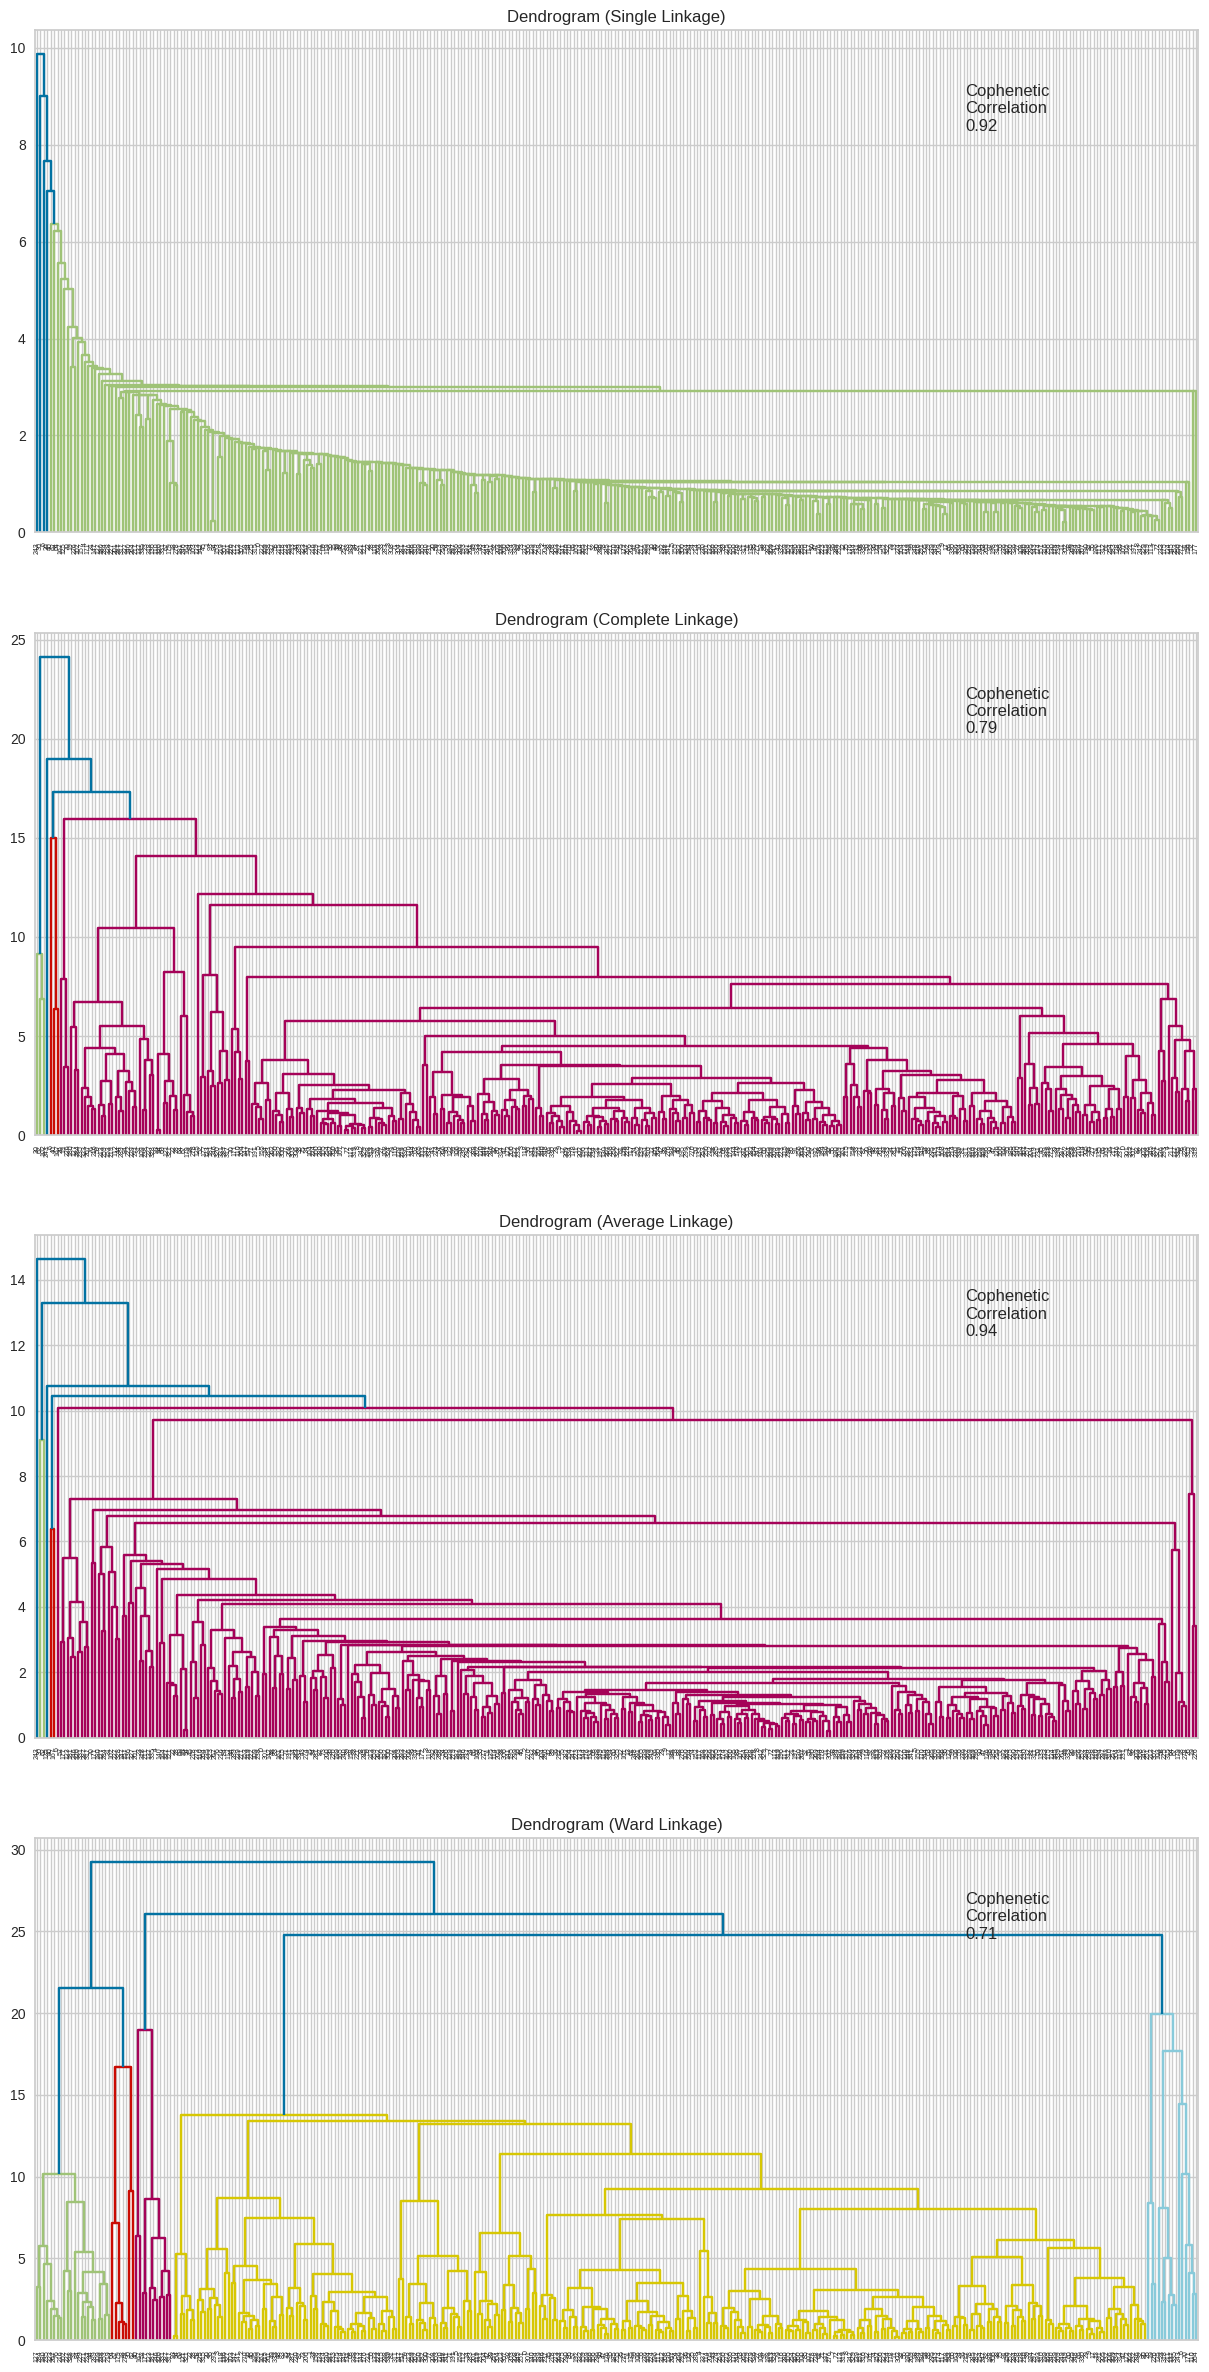

In [63]:
# list of linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']  ## Commonly used linkage methods

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

# Display the results
plt.show()


In [64]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
3,ward,0.710118
1,complete,0.787328
0,single,0.923227
2,average,0.942254


### Creating model using sklearn

In [66]:
from sklearn.cluster import AgglomerativeClustering

# Define the hierarchical clustering model
# Removing 'affinity' parameter and using 'ward' linkage, which implicitly assumes Euclidean distance
HCmodel = AgglomerativeClustering(n_clusters=6, linkage='ward')

# Fit the model to the scaled dataset
HCmodel.fit(hc_df)

AgglomerativeClustering(n_clusters=6)

In [67]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

### Cluster Profiling

In [69]:
# Cluster Profiling
# Select only numerical columns before calculating the mean
hc_cluster_profile = df2.select_dtypes(include=np.number).groupby("HC_segments").mean()

In [71]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Security"].count().values
)

In [72]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,42.848182,6.270446,1.123547,22.727273,71.454545,558636363.636364,14631272727.272728,3.410000,4242572567.290909,15.242169,-4.924615,11
1,84.355716,3.854981,1.827670,633.571429,33.571429,-568400000.000000,-4968157142.857142,-10.841429,398169036.442857,42.284541,-11.589502,7
2,325.996105,7.724708,1.545762,17.000000,360.333333,186503166.666667,1008736416.666667,9.544167,589434517.801667,41.121871,25.258283,12
3,72.760400,5.213307,1.427078,25.603509,60.392982,79951512.280702,1538594322.807018,3.655351,446472132.228456,24.722670,-2.647194,285
4,36.440455,-16.073408,2.832884,57.500000,42.409091,-472834090.909091,-3161045227.272727,-8.005000,514367806.201818,85.555682,0.836839,22
5,327.006671,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,366763235.300000,400.989188,-5.322376,3


In [74]:
## Complete the code to print the companies in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 3, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Lim

In [75]:
df2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      4
             Health Care                     1
             Information Technology          1
             Telecommunications Services     2
1            Consumer Discretionary          1
             Consumer Staples                2
             Energy                          2
             Financials                      1
             Industrials                     1
2            Consumer Discretionary          2
             Consumer Staples                1
             Health Care                     4
             Information Technology          3
             Real Estate                     1
             Telecommunications Services     1
3            Consumer Discretionary         35
             Consumer Staples               15
             Energy                          7
             Financials                     44
             Health Care                    34
             Industrials                    52
             Information Technology         27
             Materials                      19
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
4            Energy                         20
             Information Technology          1
             Materials                       1
5            Consumer Discretionary          1
             Health Care                     1
             Information Technology          1
Name: Security, dtype: int64

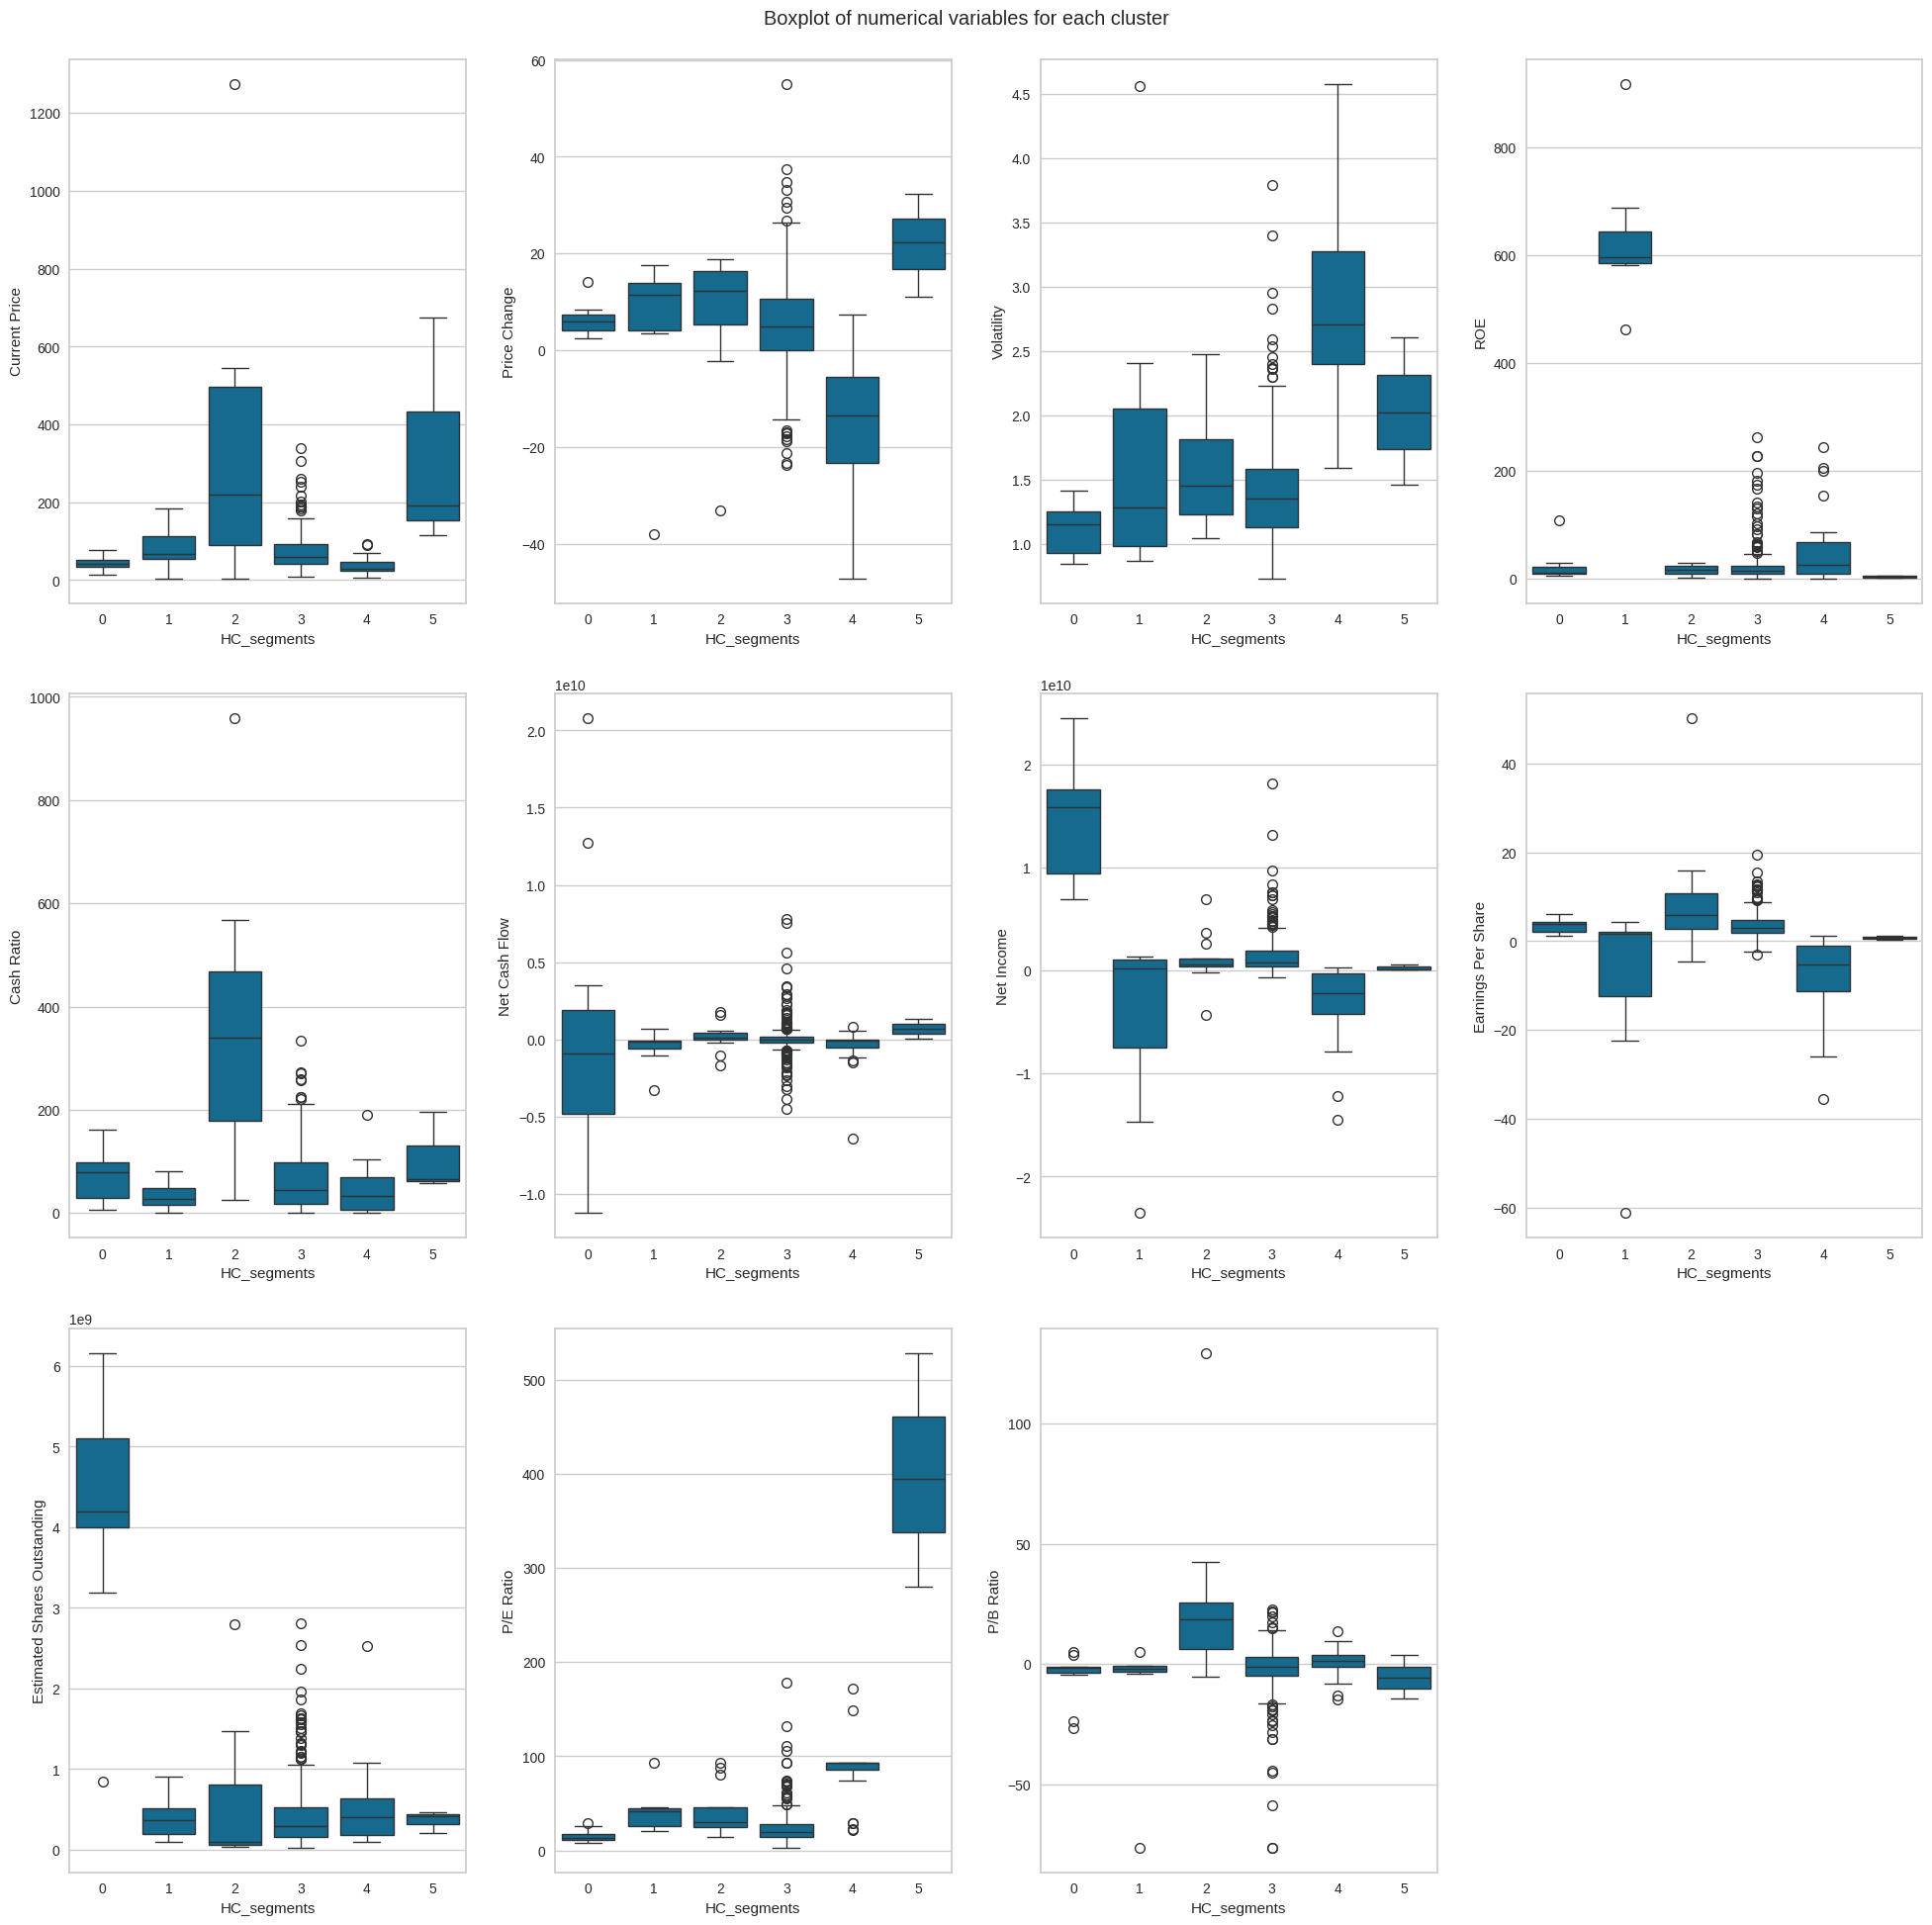

In [76]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

## Actionable Insights and Recommendations

-


___